In [113]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [114]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [115]:
len(x_train),len(x_test),x_train[0].shape

(60000, 10000, (28, 28))

In [116]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

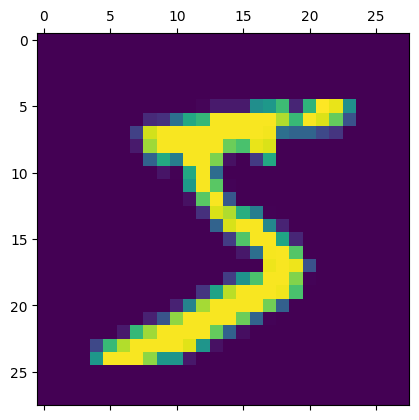

In [117]:
plt.matshow(x_train[0])

In [118]:
y_train[0],y_train[:5]

(5, array([5, 0, 4, 1, 9], dtype=uint8))

Scalling

In [119]:
x_train = x_train / 255
x_test = x_test / 255

Flatten Array

In [120]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [121]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [122]:
x_train_flatten.shape, x_test_flatten.shape

((60000, 784), (10000, 784))

Creating Neural Network Single Layer

In [123]:
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(28, 28)),  # By doing this we dont need the to flatten
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4646 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9254


In [125]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2708 - accuracy: 0.9244


[0.27076780796051025, 0.9243999719619751]

In [126]:
y_predicted = model.predict(x_test_flatten)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.01895200e-02, 3.04519347e-07, 6.55632839e-02, 9.71281290e-01,
       3.07085551e-03, 1.03006534e-01, 1.51737936e-06, 9.99822557e-01,
       9.55864415e-02, 7.10644245e-01], dtype=float32)

Confusion Matrix

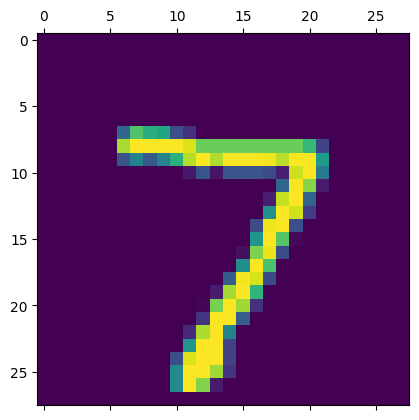

In [127]:
plt.matshow(x_test[0])

In [129]:
np.argmax(y_predicted[0]) # this returns the maximum possiblity for the specific predicting value

7

In [131]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]  ## for getting multiple prediction values
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [132]:
y_test[:5] # real data

array([7, 2, 1, 0, 4], dtype=uint8)

Confusion matrix

In [133]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    2,    1,    6,    7,    3,    3,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,    9,  922,   20,    9,    4,   13,   10,   34,    6],
       [   1,    0,   17,  937,    0,   16,    2,   11,   14,   12],
       [   1,    2,    4,    1,  906,    0,   10,    3,    5,   50],
       [   7,    1,    3,   43,   11,  765,   15,    9,   29,    9],
       [   8,    3,    6,    2,    8,   17,  909,    2,    3,    0],
       [   1,    7,   22,    8,    9,    0,    0,  937,    1,   43],
       [   4,   10,    7,   36,    9,   26,    9,   10,  846,   17],
       [   9,    7,    1,   11,   14,    6,    0,    8,    4,  949]])>

Text(95.72222222222221, 0.5, 'Truth')

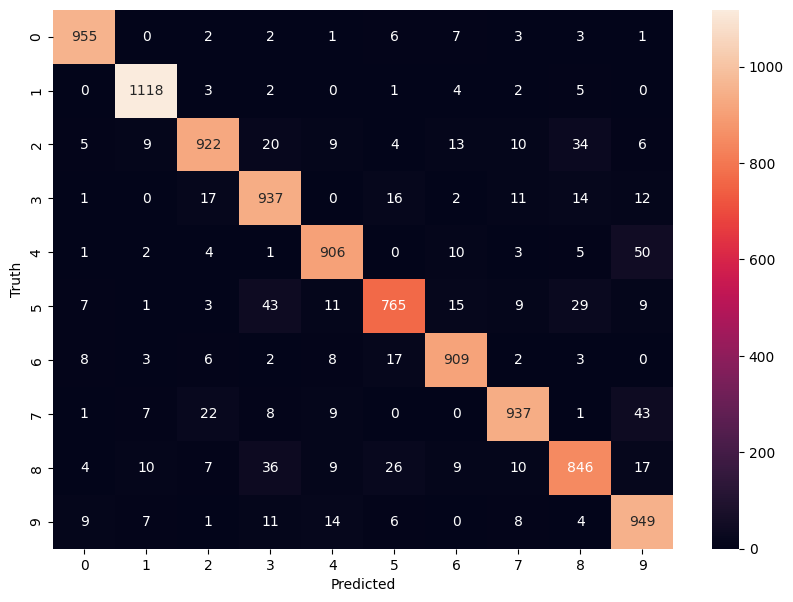

In [134]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Multiple Layers- Hidden Layers

In [136]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1255 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0871 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0664 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0523 - accuracy: 0.9841


In [140]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9752


[0.08324552327394485, 0.9751999974250793]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

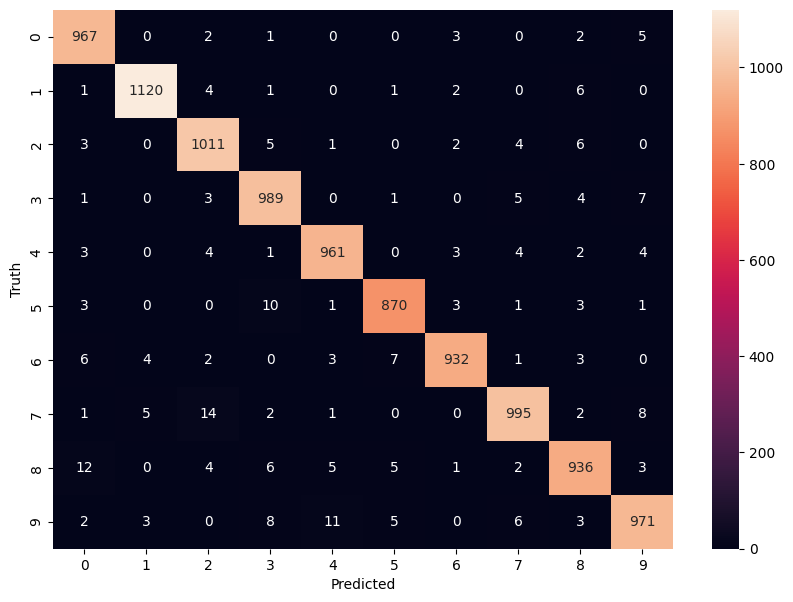

In [142]:
y_predicted = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')